In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data PreProcessing and Visualization

In [4]:
df = pd.read_csv('C:/Users/nsaik/OneDrive/Desktop/GITPRojects/Project-3--Predicting-Credit-Card-Approval/Resources/credit-approval_csv - pandas.csv')
df.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [5]:
#checking the null entries in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               678 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null float64
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
# Replace "?" with NaN
df.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
df["Age"] = pd.to_numeric(df["Age"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               678 non-null float64
Debt              690 non-null float64
Married           684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null float64
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [8]:
#replace missing values with mean values of numeric columns
df.fillna(df.mean(), inplace=True)

In [9]:
def imputeWithMode(dataframe):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null float64
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [11]:
df_filtered=df.drop(["ZipCode"],axis=1)

In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
Gender            690 non-null object
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
Income            690 non-null int64
Approved          690 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 81.0+ KB


In [13]:
df_filtered.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [14]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df_filtered:
    if df_filtered[col].dtypes=='object':
        df_filtered[col]=LE.fit_transform(df_filtered[col])
df_filtered.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,0,0


In [15]:
df_dummies = pd.get_dummies(df_filtered, columns=[ "Married","EducationLevel", "Citizen", "DriversLicense", "Ethnicity"])
df_dummies.head()

,Gender,Age,Debt,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,Income,Approved,...,DriversLicense_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Ethnicity_6,Ethnicity_7,Ethnicity_8
0,1,30.83,0.000,0,1.25,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,58.67,4.460,0,3.04,1,1,6,560,0,...,0,0,0,0,1,0,0,0,0,0
2,0,24.50,0.500,0,1.50,1,0,0,824,0,...,0,0,0,0,1,0,0,0,0,0
3,1,27.83,1.540,0,3.75,1,1,5,3,0,...,1,0,0,0,0,0,0,0,1,0
4,1,20.17,5.625,0,1.71,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 41 columns):
Gender               690 non-null int32
Age                  690 non-null float64
Debt                 690 non-null float64
BankCustomer         690 non-null int32
YearsEmployed        690 non-null float64
PriorDefault         690 non-null int32
Employed             690 non-null int32
CreditScore          690 non-null int64
Income               690 non-null int64
Approved             690 non-null int32
Married_0            690 non-null uint8
Married_1            690 non-null uint8
Married_2            690 non-null uint8
EducationLevel_0     690 non-null uint8
EducationLevel_1     690 non-null uint8
EducationLevel_2     690 non-null uint8
EducationLevel_3     690 non-null uint8
EducationLevel_4     690 non-null uint8
EducationLevel_5     690 non-null uint8
EducationLevel_6     690 non-null uint8
EducationLevel_7     690 non-null uint8
EducationLevel_8     690 non-null uint8
Education

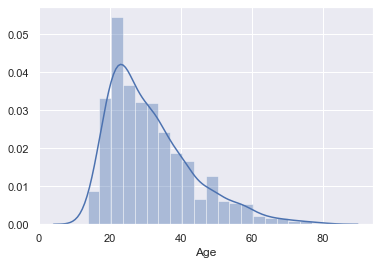

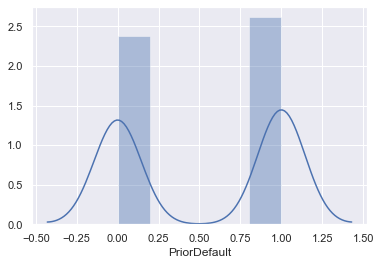

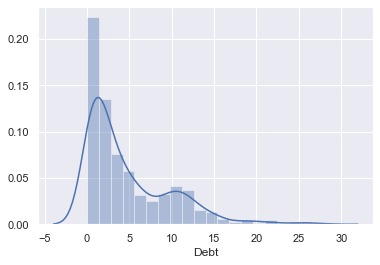

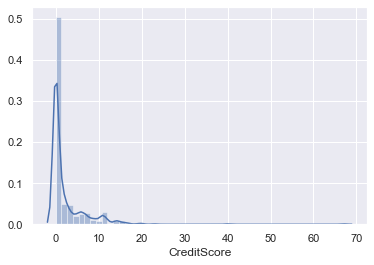

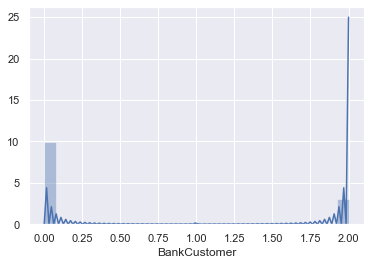

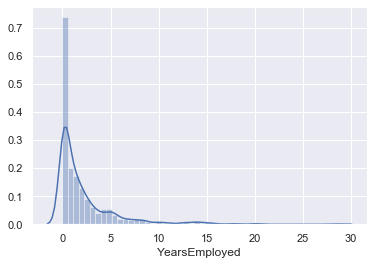

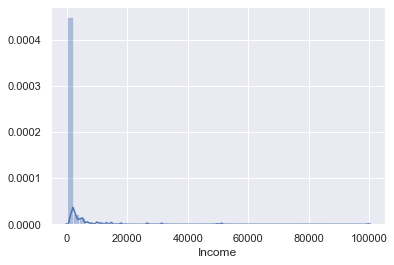

In [27]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(df_dummies['Age'])
plotDistPlot(df_dummies['PriorDefault'])
plotDistPlot(df_dummies['Debt'])
plotDistPlot(df_dummies['CreditScore'])
plotDistPlot(df_dummies['BankCustomer'])
plotDistPlot(df_dummies['YearsEmployed'])
plotDistPlot(df_dummies['Income'])

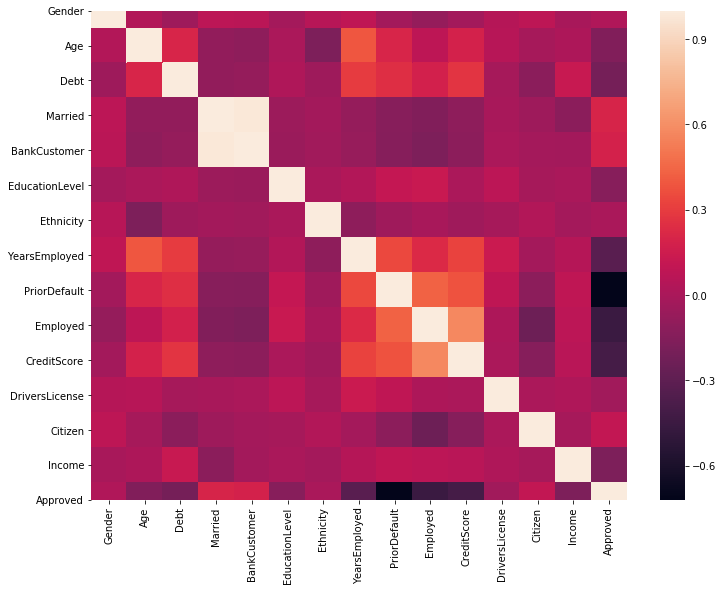

In [15]:
corr = df_filtered.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.savefig('Correlation Matrix.jpeg')

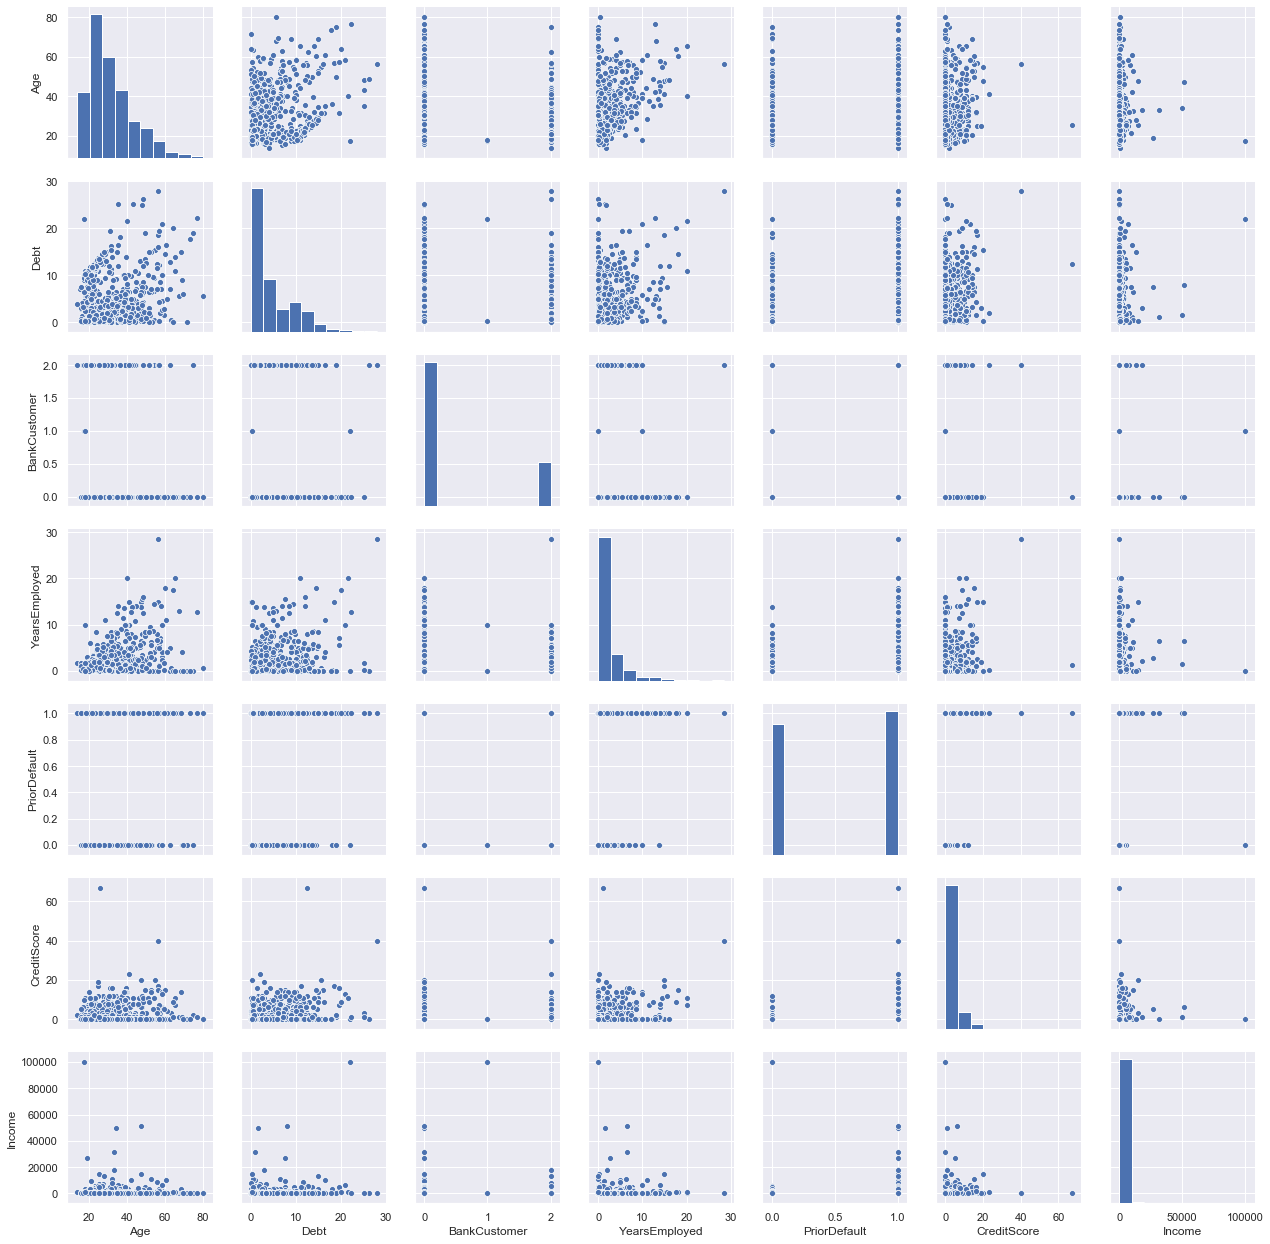

In [18]:
sns.set()
cols = ['Age', 'Debt', 'BankCustomer','YearsEmployed','PriorDefault','CreditScore','Income']
sns.pairplot(df_filtered[cols], height = 2.5)
plt.savefig('scatterplot.jpeg')
plt.show()


In [18]:
df_dummies.columns

Index(['Gender', 'Age', 'Debt', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'Income', 'Approved',
       'Married_0', 'Married_1', 'Married_2', 'EducationLevel_0',
       'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
       'EducationLevel_4', 'EducationLevel_5', 'EducationLevel_6',
       'EducationLevel_7', 'EducationLevel_8', 'EducationLevel_9',
       'EducationLevel_10', 'EducationLevel_11', 'EducationLevel_12',
       'EducationLevel_13', 'Citizen_0', 'Citizen_1', 'Citizen_2',
       'DriversLicense_0', 'DriversLicense_1', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4', 'Ethnicity_5',
       'Ethnicity_6', 'Ethnicity_7', 'Ethnicity_8'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X,y = df_dummies.iloc[:,df_dummies.columns != 'Approved'] , df_dummies["Approved"]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators=100)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Random Forest classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Random Forest classifier has accuracy of:  0.855072463768116


array([[47, 15],
       [ 5, 71]], dtype=int64)

In [23]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(rescaledX_train, y_train)
logisticRegr.predict(rescaledX_test)
print("Logistic classifier has accuracy of: ", logisticRegr.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic classifier has accuracy of:  0.8333333333333334


C:\Users\nsaik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[47, 15],
       [ 5, 71]], dtype=int64)

Feature ranking:
1. feature 5 (0.270101)
2. feature 4 (0.105862)
3. feature 7 (0.097201)
4. feature 8 (0.088627)
5. feature 2 (0.087519)
6. feature 1 (0.073860)
7. feature 6 (0.062728)
8. feature 0 (0.015311)
9. feature 30 (0.013450)
10. feature 34 (0.013449)
11. feature 13 (0.011115)
12. feature 25 (0.010873)
13. feature 38 (0.010406)
14. feature 3 (0.010067)
15. feature 22 (0.009900)
16. feature 29 (0.009673)
17. feature 14 (0.009335)
18. feature 18 (0.009021)
19. feature 11 (0.008418)
20. feature 10 (0.007832)
21. feature 20 (0.007525)
22. feature 24 (0.006897)
23. feature 26 (0.006663)
24. feature 21 (0.006207)
25. feature 31 (0.006089)
26. feature 33 (0.005907)
27. feature 28 (0.005683)
28. feature 17 (0.005625)
29. feature 12 (0.005076)
30. feature 16 (0.004781)
31. feature 15 (0.003797)
32. feature 35 (0.002527)
33. feature 27 (0.002495)
34. feature 36 (0.001839)
35. feature 39 (0.001438)
36. feature 9 (0.001034)
37. feature 19 (0.000650)
38. feature 32 (0.000634)
39. feature 23

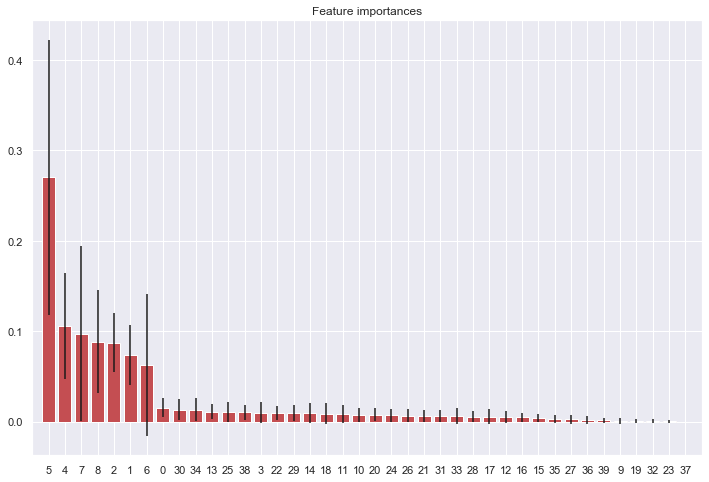

In [24]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.savefig('featureimportance.jpeg')
plt.show()


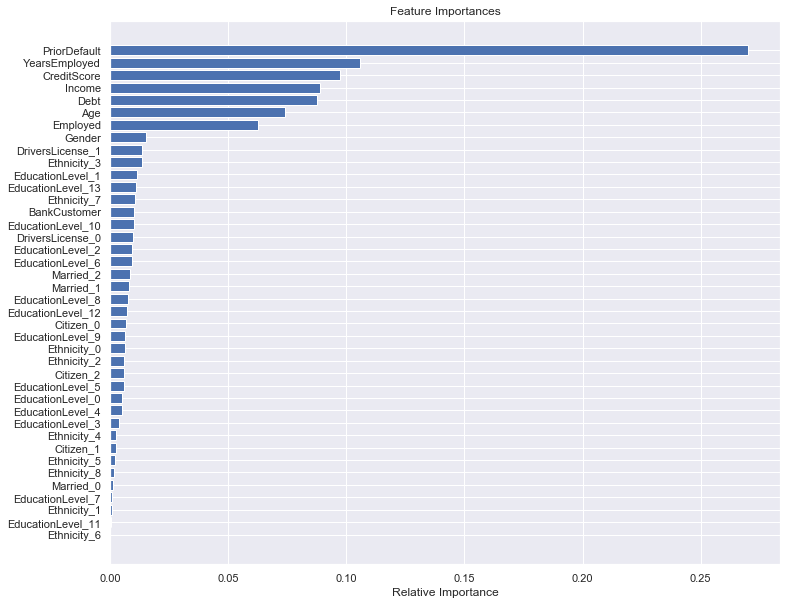

In [25]:
df_dummies = df_dummies.drop(['Approved'], axis=1)
features = df_dummies.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('RelativeImportance.jpeg')
plt.show()
